<h2>Manejo de valores perdidos y outliers</h2>

<h4>DataSet Titanic</h4>

¿De qué trata el dataset? El objetivo principal suele ser predecir qué pasajeros sobrevivieron al naufragio basándose en características como su edad, sexo, clase de boleto y si viajaban solos o acompañados.

Estas son las variables principales que contiene:
* Survived: Si sobrevivió (0 = No, 1 = Sí).
* Pclass: Clase del boleto (1ª, 2ª, 3ª).
* Sex: Sexo del pasajero.
* Age: Edad en años.
* SibSp: Número de hermanos o cónyuges a bordo.
* Parch: Número de padres o hijos a bordo.
* Fare: Tarifa del pasaje.
* Embarked: Puerto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton).

<h4>Ejemplo de DataFrame con Valores Perdidos</h4>

In [1]:
import pandas as pd
import numpy as np

import pandas as pd
df = pd.read_csv('data/Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [27]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<h3>Visualización de valores perdidos</h3>

In [ ]:
#pip install missingno

Note: you may need to restart the kernel to use updated packages.


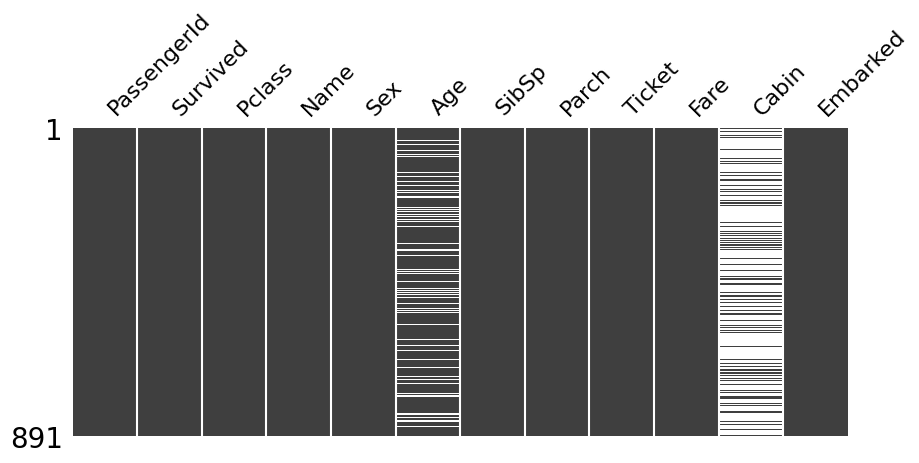

In [2]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df, figsize=(10, 4), sparkline=False)
plt.show()

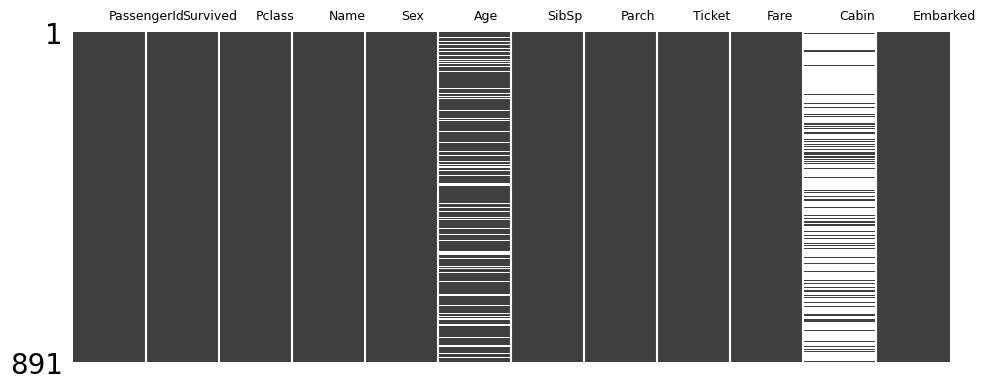

In [34]:
import missingno as msno
import matplotlib.pyplot as plt

ax = msno.matrix(df, figsize=(10, 4), sparkline=False)
ax.tick_params(axis='x', labelsize=9)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


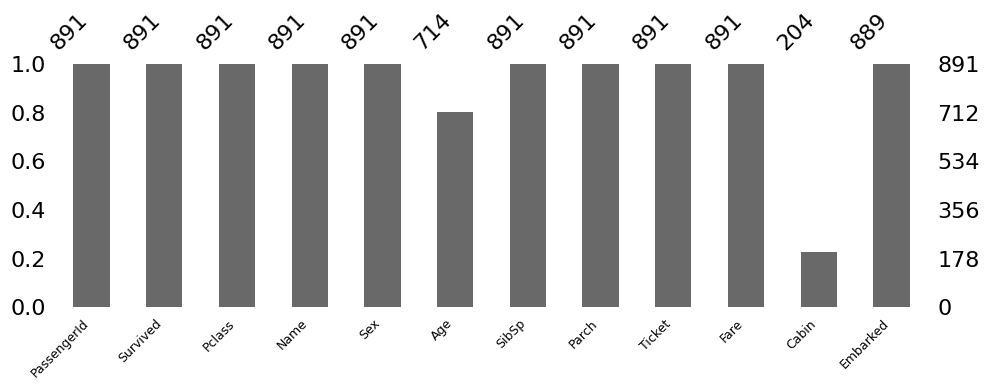

In [ ]:
ax = msno.bar(df, figsize=(10, 4))
ax.tick_params(axis='x', labelsize=9)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()



<h3>Patrones de valores nulos</h3>
Este gráfico de calor muestra correlaciones entre columnas con valores faltantes, lo que puede indicar relaciones en la estructura de los datos. Identificar estos patrones es fundamental para determinar la estrategia más adecuada para el tratamiento de los valores perdidos.

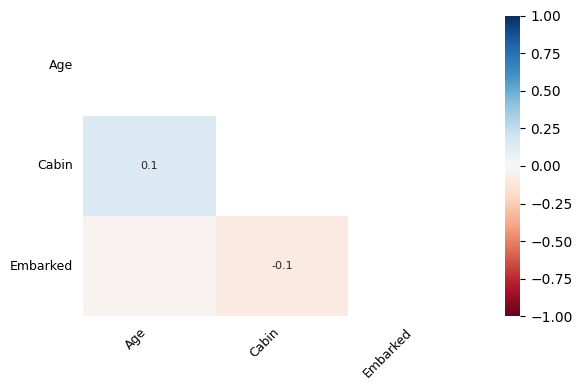

In [ ]:
# Heatmap de Correlación de Nulidad
ax = msno.heatmap(df, figsize=(6, 4))
ax.tick_params(axis='both', labelsize=9)

for t in ax.texts:
    t.set_fontsize(8)

plt.tight_layout()
plt.show()


Es una herramienta muy útil en la fase de limpieza de datos (EDA) para entender no si faltan datos, sino cómo se relacionan las ausencias entre diferentes columnas.

A diferencia de un mapa de calor común que mide la correlación entre valores (como peso vs. altura), este mide la correlación de presencia de datos:
- Mide si el hecho de que falte un valor en la columna "Age" está relacionado con que también falte en "Cabin".

Interpretación de los Colores y Valores
El gráfico utiliza una escala que va de -1 a 1:
- 1 (Azul oscuro): Correlación positiva perfecta. Si falta un dato en la columna A, siempre falta en la columna B.
- 0 (Blanco): No hay relación aparente. Que falte un dato en una columna no nos dice nada sobre la otra.
- -1 (Rojo oscuro): Correlación negativa perfecta. Si falta un dato en la columna A, en la columna B siempre está presente (y viceversa).


<h3>Filtrado de la Data Perdida</h3>

In [5]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
## Identificar valores perdidos (conteo y %)

# Conteo de nulos por columna
nulos = df.isna().sum().sort_values(ascending=False)

# Porcentaje de nulos por columna
pct_nulos = (df.isna().mean() * 100).round(2).sort_values(ascending=False)

resumen_nulos = pd.DataFrame({
    "nulos": nulos,
    "%_nulos": pct_nulos
})

print(resumen_nulos)


             nulos  %_nulos
Cabin          687    77.10
Age            177    19.87
Embarked         2     0.22
PassengerId      0     0.00
Name             0     0.00
Pclass           0     0.00
Survived         0     0.00
Sex              0     0.00
Parch            0     0.00
SibSp            0     0.00
Fare             0     0.00
Ticket           0     0.00


<h3>Métodos de Eliminación en Pandas</h3>

In [7]:
import pandas as pd
import numpy as np

# Creamos un DataFrame de ejemplo
data = {
    'Producto': ['Teclado', 'Mouse', 'Monitor', 'Cable HDMI'],
    'Precio': [25.0, np.nan, 150.0, np.nan],
    'Stock': [10, np.nan, 5, np.nan],
    'Marca': ['Logitech', 'Genius', np.nan, np.nan]
}

df = pd.DataFrame(data)

print("DataFrame Original:")
print(df)

DataFrame Original:
     Producto  Precio  Stock     Marca
0     Teclado    25.0   10.0  Logitech
1       Mouse     NaN    NaN    Genius
2     Monitor   150.0    5.0       NaN
3  Cable HDMI     NaN    NaN       NaN


df.dropna() : Elimina filas que contienen al menos un valor NaN

In [10]:
# El comando a secas
df_resultado = df.dropna()

print(df_resultado)

  Producto  Precio  Stock     Marca
0  Teclado    25.0   10.0  Logitech


df.dropna(axis=1): Elimina columnas que contienen al menos un valor NaN

In [9]:
# Eliminamos cualquier columna que tenga al menos un valor nulo
df_limpio = df.dropna(axis=1)

print("\nDespués de dropna(axis=1):")
print(df_limpio)


Después de dropna(axis=1):
     Producto
0     Teclado
1       Mouse
2     Monitor
3  Cable HDMI


df.dropna(thresh=n): Elimina filas que no tienen al menos n valores no nulos

In [8]:
# Aplicamos dropna con thresh=3
# "Mantener solo las filas que tengan al menos 3 valores reales (no nulos)"
df_filtrado = df.dropna(thresh=3)

print("\nDataFrame después de dropna(thresh=3):")
print(df_filtrado)


DataFrame después de dropna(thresh=3):
  Producto  Precio  Stock     Marca
0  Teclado    25.0   10.0  Logitech
2  Monitor   150.0    5.0       NaN


In [39]:
# Nº de nulos por fila
df["nulos_fila"] = df.isna().sum(axis=1)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,nulos_fila
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [40]:
# Top 10 filas con más nulos
print(df.sort_values("nulos_fila", ascending=False).head(10))

     PassengerId  Survived  Pclass                           Name     Sex  \
5              6         0       3               Moran, Mr. James    male   
19            20         1       3        Masselmani, Mrs. Fatima  female   
17            18         1       2   Williams, Mr. Charles Eugene    male   
674          675         0       2     Watson, Mr. Ennis Hastings    male   
32            33         1       3       Glynn, Miss. Mary Agatha  female   
29            30         0       3            Todoroff, Mr. Lalio    male   
28            29         1       3  O'Dwyer, Miss. Ellen "Nellie"  female   
26            27         0       3        Emir, Mr. Farred Chehab    male   
667          668         0       3     Rommetvedt, Mr. Knud Paust    male   
692          693         1       3                   Lam, Mr. Ali    male   

     Age  SibSp  Parch  Ticket     Fare Cabin Embarked  nulos_fila  
5    NaN      0      0  330877   8.4583   NaN        Q           2  
19   NaN      

<h2>Imputación de Datos</h2>

<h3>1. Imputación con valores estadísticos</h3>

<b>Imputación con la media</b><br>
Estamos reemplazando los valores faltantes por un valor promedio.

In [ ]:
# Valor de la media
media_age = df["Age"].mean()

# Imputar
df_mean = df.copy()
df_mean["Age"] = df_mean["Age"].fillna(media_age)

print("Media utilizada:", round(media_age, 2))
print("Nulos en Age:", df_mean["Age"].isna().sum())

Media utilizada: 29.7
Nulos en Age: 0


<b>Imputación con la mediana</b><br>
La mediana es menos sensible a valores extremos, por eso suele ser la opción más segura

In [42]:
# Valor de la mediana
mediana_age = df["Age"].median()

# Imputar
df_median = df.copy()
df_median["Age"] = df_median["Age"].fillna(mediana_age)

print("Mediana utilizada:", mediana_age)
print("Nulos en Age:", df_median["Age"].isna().sum())


Mediana utilizada: 28.0
Nulos en Age: 0


<b>Imputación con la moda</b><br>
En variables categóricas no tiene sentido media o mediana; usamos la categoría más frecuente

In [43]:
# Moda de Embarked
moda_embarked = df["Embarked"].mode()[0]

# Imputar
df_mode = df.copy()
df_mode["Embarked"] = df_mode["Embarked"].fillna(moda_embarked)

print("Moda utilizada:", moda_embarked)
print("Nulos en Embarked:", df_mode["Embarked"].isna().sum())


Moda utilizada: S
Nulos en Embarked: 0


<b>Imputar Age por grupo (sexo + clase)</b>

In [48]:
df_group = df.copy()

print("Nulos en Age:", df_group["Age"].isna().sum())

# Medianas por grupo (para mostrar en clase)
print(df.groupby(["Sex", "Pclass"])["Age"].median())


Nulos en Age: 177
Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64


In [49]:
df_group["Age"] = df_group.groupby(
    ["Sex", "Pclass"]
)["Age"].transform(lambda x: x.fillna(x.median()))

print("Nulos en Age:", df_group["Age"].isna().sum())


Nulos en Age: 0


<h3>2. Métodos de imputación para valores cualitativos</h3>

<b>Imputación con la moda</b><br>
Embarked: Como la mayoría de los pasajeros embarcó en el mismo puerto, reemplazamos los valores faltantes por la categoría más frecuente.

In [14]:
df_moda = df.copy()

In [15]:
df_moda

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [16]:
df_moda.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
df["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [22]:
moda_embarked = df["Embarked"].mode()[0]

In [23]:
moda_embarked

'S'

In [25]:
df_moda["Embarked"] = df_moda["Embarked"].fillna(moda_embarked)

print("Moda utilizada:", moda_embarked)
print("Nulos en Embarked:", df_moda["Embarked"].isna().sum())

Moda utilizada: S
Nulos en Embarked: 0


<b>Imputación con una nueva categoría</b><br>
Aquí no intentamos adivinar la cabina. Decimos explícitamente: no se conoce.
Eso evita inventar información.

In [26]:
df_categoria = df.copy()
df_categoria["Cabin"] = df_categoria["Cabin"].fillna("Desconocido")

print(df_categoria["Cabin"].value_counts())

Cabin
Desconocido    687
G6               4
C23 C25 C27      4
B96 B98          4
F2               3
              ... 
E17              1
A24              1
C50              1
B42              1
C148             1
Name: count, Length: 148, dtype: int64


<b>Imputación basada en agrupaciones</b><br>


In [27]:
df_group = df.copy()

df_group["Embarked"] = df_group.groupby("Pclass")["Embarked"] \
                               .transform(lambda x: x.fillna(x.mode()[0]))

print("Nulos en Embarked:", df_group["Embarked"].isna().sum())


Nulos en Embarked: 0


<h2>¿Qué es un Outlier?</h2>

<b>Método del Rango Intercuartil (IQR)</b><br>
Este método busca valores que se escapan del rango donde vive el 50% central de los datos.


In [59]:
Q1 = df["Fare"].quantile(0.25)
Q3 = df["Fare"].quantile(0.75)
IQR = Q3 - Q1

lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

outliers_iqr = df[
    (df["Fare"] < lim_inf) | (df["Fare"] > lim_sup)
]

print("Outliers detectados (IQR):", outliers_iqr.shape[0])


Outliers detectados (IQR): 116


<b>Z-score</b><br>
Aquí medimos qué tan lejos está un valor respecto a la media, en unidades de desviación estándar.

In [60]:
from scipy.stats import zscore
import numpy as np

df["z_age"] = zscore(df["Age"])

outliers_z = df[np.abs(df["z_age"]) > 3]

print("Outliers detectados (Z-score):", outliers_z.shape[0])

# limpiar columna auxiliar
df = df.drop(columns=["z_age"])


Outliers detectados (Z-score): 0


<b>Diagramas de caja (Boxplots)</b><br>
Los puntos que quedan fuera de los bigotes son posibles outliers.
No significa que sean errores: son observaciones extremas.

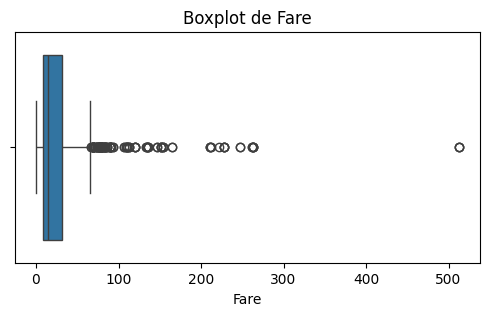

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 3))
sns.boxplot(x=df["Fare"])
plt.title("Boxplot de Fare")
plt.show()

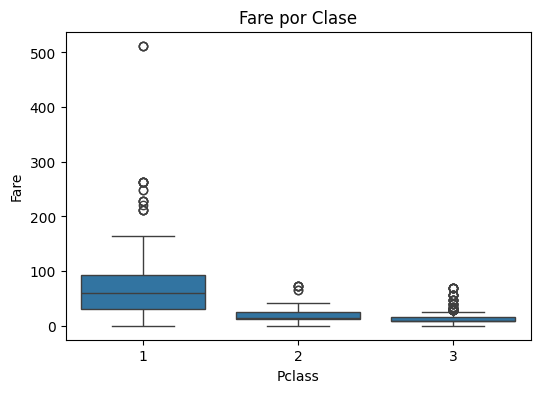

In [62]:
plt.figure(figsize=(6, 4))
sns.boxplot(x="Pclass", y="Fare", data=df)
plt.title("Fare por Clase")
plt.show()


<h3>Histogramas y gráficos de dispersión</h3>
<b>Histograma de Fare</b>

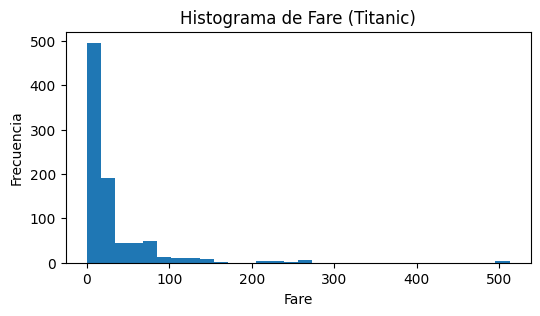

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 3))
plt.hist(df["Fare"].dropna(), bins=30)
plt.title("Histograma de Fare (Titanic)")
plt.xlabel("Fare")
plt.ylabel("Frecuencia")
plt.show()


Si vemos una cola larga hacia la derecha, significa que hay pocos casos con tarifas muy altas: posibles outliers, pero no necesariamente errores.

<b>Gráfico de dispersión</b>


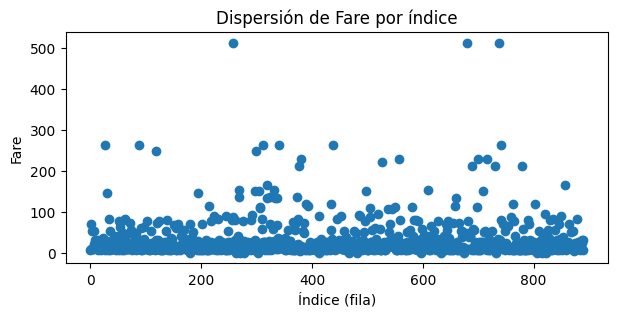

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 3))
plt.scatter(range(len(df)), df["Fare"])
plt.title("Dispersión de Fare por índice")
plt.xlabel("Índice (fila)")
plt.ylabel("Fare")
plt.show()


La mayoría de puntos se concentra abajo, pero algunos se van muy arriba: esos son candidatos a outliers.

<h2>Parte 2</h2>

<h3>Modelos basados en aprendizaje automático</h3>

Isolation Forest

In [29]:
import matplotlib.pyplot as plt

from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [30]:
import pandas as pd
df = pd.read_csv("Titanic-Dataset.csv")

In [31]:
# Seleccionar variables numéricas
cols = ["Age", "Fare", "SibSp", "Parch"]
X = df[cols].copy()

# imputar nulos + escalar (buena práctica para modelos basados en distancia/variación)
imputer = SimpleImputer(strategy="median") # Busca valores NaN Los reemplaza por la mediana de la columna
scaler = StandardScaler() # Escalar evita que una variable mande solo porque está en números más grandes.

# Rellenamos NaN con valores razonables
# Ponemos todas las variables al mismo nivel
# Recién ahí el modelo aprende patrones reales
X_imp = imputer.fit_transform(X)
X_scaled = scaler.fit_transform(X_imp)


<p>Antes de aplicar un modelo, los datos deben estar completos y comparables.
La imputación resuelve los nulos; el escalado evita sesgos por magnitud.</p>

In [32]:
# Entrenar Isolation Forest

# Crear el modelo Isolation Forest
iso = IsolationForest(
    n_estimators=200,     # Número de árboles de decisión que componen el bosque.
    contamination=0.05,   # Asume que aproximadamente el 5% de los datos son anomalías
    random_state=42       # Fija la aleatoriedad
)

# Entrena el modelo y Clasifica cada fila
pred = iso.fit_predict(X_scaled)   # -1 = outlier, 1 = normal

# Puntaje de anomalía
# Esto devuelve un score continuo de “rareza”
# Valores más altos (cercanos a 0) → normales
# Valores más bajos (negativos) → más anómalos
score = iso.decision_function(X_scaled)  # más bajo = más anómalo


In [33]:
# Marcar outliers en el DataFrame
df_if = df.copy()
df_if["outlier_if"] = (pred == -1) # pred viene de fit_predict() y trae 1 (normal) o -1 (outlier).
                                   # La expresión (pred == -1) transforma eso en True/False:
df_if["if_score"] = score          # score es el “nivel de rareza” que entrega decision_function.

df_if["outlier_if"].value_counts() # Contar cuántos outliers encontró

outlier_if
False    846
True      45
Name: count, dtype: int64

In [34]:
# Ver los casos más extremos
df_if.sort_values("if_score").head(10)[cols + ["if_score", "outlier_if"]]


,Age,Fare,SibSp,Parch,if_score,outlier_if
438,64.0,263.0000,1,4,-0.154570,True
679,36.0,512.3292,0,1,-0.109410,True
737,35.0,512.3292,0,0,-0.105242,True
258,35.0,512.3292,0,0,-0.105242,True
27,19.0,263.0000,3,2,-0.092285,True
341,24.0,263.0000,3,2,-0.091248,True
88,23.0,263.0000,3,2,-0.090262,True
846,NaN,69.5500,8,2,-0.089467,True
159,NaN,69.5500,8,2,-0.089467,True
324,NaN,69.5500,8,2,-0.089467,True


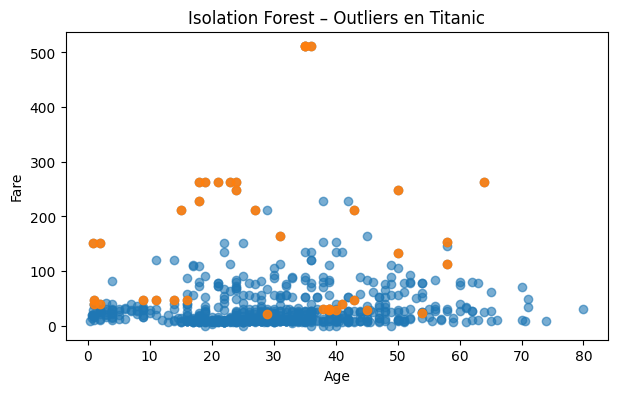

In [35]:
# Visualización
import matplotlib.pyplot as plt

# Primero dibujo todo el dataset. Después dibujo encima solo los outliers, para destacarlos.
plt.figure(figsize=(7,4))
plt.scatter(df_if["Age"], df_if["Fare"], alpha=0.6)
plt.scatter(
    df_if.loc[df_if["outlier_if"], "Age"],
    df_if.loc[df_if["outlier_if"], "Fare"],
    alpha=0.9
)
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Isolation Forest – Outliers en Titanic")
plt.show()


<h3>Ejemplo práctico de detección de outliers con IQR</h3>

In [17]:
import numpy as np
import pandas as pd
# Datos de ejemplo
datos = [25, 29, 30, 31, 32, 35, 37, 120, 300]
df = pd.DataFrame(datos, columns=['Valor'])
# Calcular Q1, Q3 e IQR
Q1 = df['Valor'].quantile(0.25)
Q3 = df['Valor'].quantile(0.75)
IQR = Q3 - Q1
# Definir límites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
# Filtrar outliers
outliers = df[(df['Valor']<limite_inferior)| (df['Valor']>limite_superior)]
print("Outliers:", outliers['Valor'].tolist())
# Datos sin outliers
datos_limpios=df[(df['Valor']>=limite_inferior) & (df['Valor']<=limite_superior)]


Outliers: [120, 300]


<h3>Detección de Outliers con Z-score</h3>

In [20]:
from scipy import stats
import numpy as np
import pandas as pd
# Datos de ejemplo
datos = [25, 29, 30, 31, 32, 35, 37, 120, 300]
df = pd.DataFrame(datos, columns=['Valor'])
# Calcular Z-score
z_scores = stats.zscore(df['Valor'])
df['Z-score'] = z_scores
# Identificar outliers (|z| > 3)
outliers = df[abs(df['Z-score']) > 3]
print("Outliers:", outliers['Valor'].tolist())
# Datos sin outliers
datos_limpios = df[abs(df['Z-score']) <= 3]


Outliers: []


<h3>Ejemplo de Winsorización</h3>

In [23]:
from scipy import stats
import numpy as np
import pandas as pd
# Datos de ejemplo
datos = [25, 29, 30, 31, 32, 35, 37, 120, 300]
df = pd.DataFrame(datos, columns=['Valor'])
# Winsorización al 5% y 95%
winsorized = stats.mstats.winsorize(df['Valor'], limits=[0.05, 0.05])
df['Winsorizado'] = winsorized
print(df)



   Valor  Winsorizado
0     25           25
1     29           29
2     30           30
3     31           31
4     32           32
5     35           35
6     37           37
7    120          120
8    300          300
